In [1]:
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sb

In [2]:
import time
from time import strptime, strftime
from pandas.tseries.offsets import MonthEnd

In [3]:
pd.set_option("display.max_rows", 100) # max number or rows to be displayed 
plt.rcParams['figure.figsize'] = [10, 6]
idx = pd.IndexSlice

In [4]:
import numpy as np
import datetime
from pandas.tseries.offsets import MonthEnd

In [5]:
df = pd.read_csv("CRSPm.csv")

In [6]:
df.head()

,date,GE,IBM,UA,SEE
0,1/30/1970,72.375,335.25,32.875,7.750
1,2/27/1970,70.500,340.25,37.750,7.250
2,3/31/1970,73.750,338.50,36.000,7.125
3,4/30/1970,71.250,298.00,30.000,5.750
4,5/29/1970,66.375,278.00,29.875,5.750


In [7]:
df.tail()

,date,GE,IBM,UA,SEE
631,8/31/2022,73.44,128.45000,89.75,67.92
632,9/30/2022,61.91,118.81000,81.86,67.13
633,10/31/2022,77.81,138.28999,94.82,66.96
634,11/30/2022,85.97,148.89999,98.72,64.21
635,12/30/2022,83.79,140.89000,100.92,62.18


In [8]:
df = df.set_index(pd.DatetimeIndex(df["date"].values))

In [9]:
df.drop(columns=("date"), axis=1, inplace=True)

In [10]:
df

,GE,IBM,UA,SEE
1970-01-30,72.375,335.25000,32.875,7.750
1970-02-27,70.500,340.25000,37.750,7.250
1970-03-31,73.750,338.50000,36.000,7.125
1970-04-30,71.250,298.00000,30.000,5.750
1970-05-29,66.375,278.00000,29.875,5.750
...,...,...,...,...
2022-08-31,73.440,128.45000,89.750,67.920
2022-09-30,61.910,118.81000,81.860,67.130
2022-10-31,77.810,138.28999,94.820,66.960
2022-11-30,85.970,148.89999,98.720,64.210


In [11]:
returns = df.pct_change()

In [12]:
returns.head(2)

,GE,IBM,UA,SEE
1970-01-30,NaN,NaN,NaN,NaN
1970-02-27,-0.025907,0.014914,0.148289,-0.064516


In [20]:
weights = np.array([0.3, 0.25, 0.2, 0.25])

In [21]:
#Calculating average monthly return for each stock
meanMonthlyReturns = returns.mean()
print (meanMonthlyReturns)

GE     0.013112
IBM    0.002675
UA     0.006452
SEE   -0.001350
dtype: float64


In [22]:
#Calculating portfolio return 
portReturn = np.sum(meanMonthlyReturns * weights)

In [23]:
print (portReturn)

0.005555324825829983


In [24]:
#Calculating cumulative returns
returns ["Portfolio"] = returns.dot(weights)

In [25]:
returns.head(3)

,GE,IBM,UA,SEE,Portfolio
1970-01-30,NaN,NaN,NaN,NaN,NaN
1970-02-27,-0.025907,0.014914,0.148289,-0.064516,0.009485
1970-03-31,0.046099,-0.005143,-0.046358,-0.017241,-0.001038


In [26]:
#Compound of the percentage of returns over time
monthly_cum_ret = (1+returns).cumprod()

<Axes: >

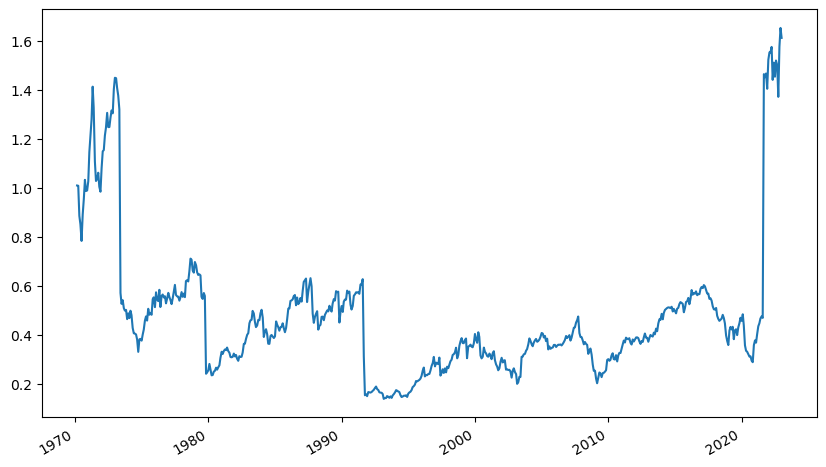

In [28]:
#Plot the cummulative returns
monthly_cum_ret.Portfolio.plot()

In [ ]:
#Above is the monthly cummulative return {GE, IBM, UA, SEE} from Jan. 1970 t0 Dec. 2022